In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)


In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [50]:
X_test.shape

(10000, 32, 32, 3)

In [51]:
y_train.shape

(50000, 1)

In [52]:
y_train = y_train.reshape(-1,)

In [53]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [54]:
y_test = y_test.reshape(-1,)

In [55]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [71]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow((X[index]))
    plt.xlabel(classes[y[index]])

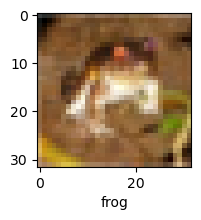

In [72]:
plot_sample(X_train,y_train,0)

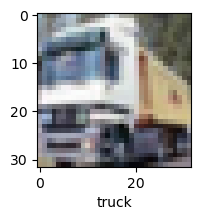

In [73]:
plot_sample(X_train,y_train,1)

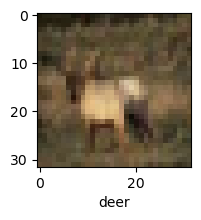

In [74]:
plot_sample(X_train,y_train,3)

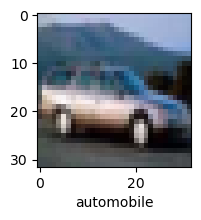

In [75]:
plot_sample(X_train,y_train,4)

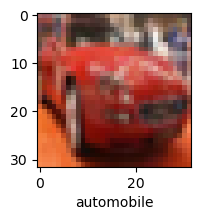

In [76]:
plot_sample(X_train,y_train,5)

## NORMALIZATION

In [77]:
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [78]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 247s 154ms/step - loss: 1.8151 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 288s 184ms/step - loss: 1.6260 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5438 - accuracy: 0.4537
Epoch 4/5
1563/1563 [==============================] - 247s 158ms/step - loss: 1.4845 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 240s 154ms/step - loss: 1.4349 - accuracy: 0.4957


In [81]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 48ms/step - loss: 1.4787 - accuracy: 0.4646
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1197 - accuracy: 0.6058
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9841 - accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8985 - accuracy: 0.6890
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8271 - accuracy: 0.7151
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7693 - accuracy: 0.7326
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7218 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6722 - accuracy: 0.7668
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6312 - accuracy: 0.7799
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [84]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 16ms/step - loss: 0.9681 - accuracy: 0.6899


[0.9681033492088318, 0.6898999810218811]